In [9]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# pequeno projeto para analisar dados de pit-stop
# biblioteca fastf1 para importar dados de corrida
# # bibliotea matplotlib para visualizar dados
# numpy e pandas para manipular dados

In [10]:
# habilitando o cache do fastf1

ff1.Cache.enable_cache('cache')


In [15]:
# coletando dados

year = 2022
circuit ='Cingapure'

# Carregando os dados da sessão

race = ff1.get_session(year,circuit, 'R')
laps = race.load_laps(with_telemetry=True)

C:\Users\e009349\Anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Singapore Grand Prix - Race [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status

In [16]:
# precisaremos de dados do piloto, stint e composto de pneus

driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
['Driver', 'Stint', 'Compound']
).count().reset_index()

# count vai contar o número de voltas específicas com o composto de pneus em questão


In [17]:
# renomeando a variárvel Lapnumber e ordenando o set de dados

driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})
driver_stints = driver_stints.sort_values(by=['Stint'])

In [20]:
# plotando os dados

compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',    
    'WET': '#00AEEF',
}

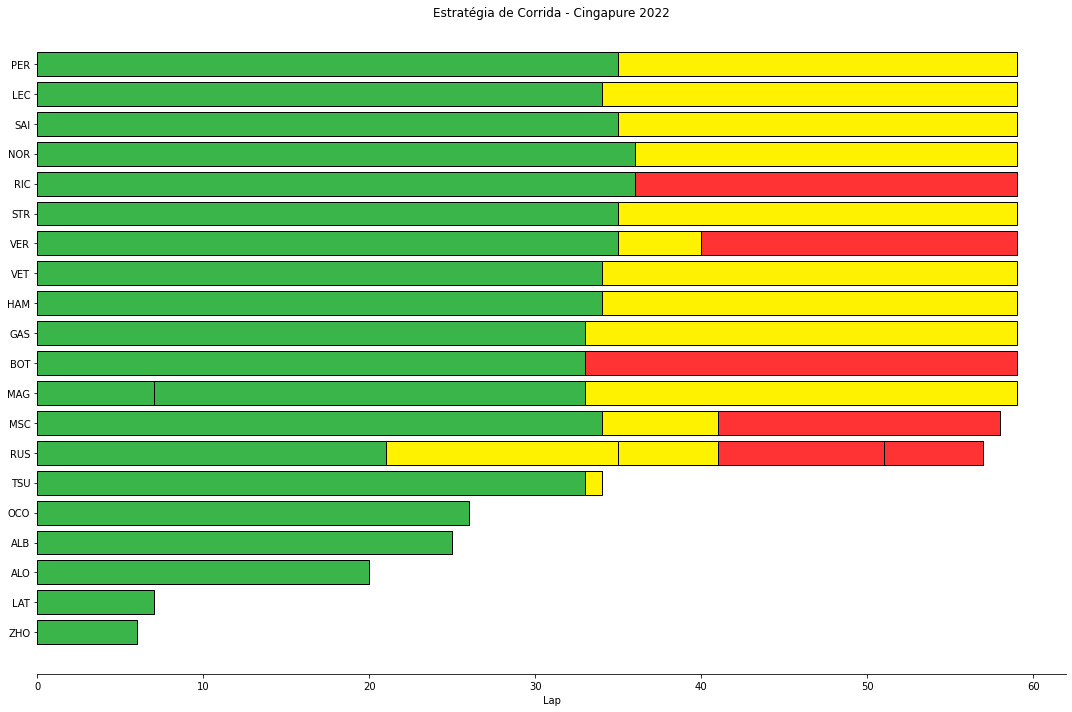

In [22]:
# finalmente, é hora de gerar o plot
plt.rcParams["figure.figsize"] = [15,10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

# criando loop para apresentar barra com dados de cada piloto

# todos os dados finais são colhidos. Podemos brincar em apresentá-los

for driver in race.results['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]
    
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
        [driver],
        stint['StintLength'],
        left=previous_stint_end,
        color=compound_colors[stint['Compound']],
            edgecolor = "black"
        )
        
        previous_stint_end = previous_stint_end + stint['StintLength']
        
# Configurando título

plt.title(f'Estratégia de Corrida - {circuit} {year}')

# Configurando x
plt.xlabel('Lap')

# y-axis invertido
plt.gca().invert_yaxis()

# Removendo frame do plot

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


In [24]:
print (race.results)

   DriverNumber BroadcastName Abbreviation         TeamName TeamColor  \
11           11       S PEREZ          PER  Red Bull Racing    1e5bc6   
16           16     C LECLERC          LEC          Ferrari    ed1c24   
55           55       C SAINZ          SAI          Ferrari    ed1c24   
4             4      L NORRIS          NOR          McLaren    f58020   
3             3   D RICCIARDO          RIC          McLaren    f58020   
18           18      L STROLL          STR     Aston Martin    2d826d   
1             1  M VERSTAPPEN          VER  Red Bull Racing    1e5bc6   
5             5      S VETTEL          VET     Aston Martin    2d826d   
44           44    L HAMILTON          HAM         Mercedes    6cd3bf   
10           10       P GASLY          GAS       AlphaTauri    4e7c9b   
77           77      V BOTTAS          BOT       Alfa Romeo    b12039   
20           20   K MAGNUSSEN          MAG     Haas F1 Team    b6babd   
47           47  M SCHUMACHER          MSC     Haas